In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import pandas as pd
from joblib import dump
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

from src.scripts.artemis_data import get_ns_cols, get_email_cols
from src.scripts.dga.dga_functions import dga_prediction

import matplotlib.pyplot as plt
import xgboost as xgb


In [2]:
file = "../data/processed/final_whois_data.csv"
df = pd.read_csv(file)


In [3]:
df.columns

Index(['domain', 'redacted', 'name_servers_1', 'name_servers_2',
       'name_servers_3', 'name_servers_4', 'registrant_contact_name',
       'registrar', 'updated_date', 'country', 'dnssec', 'emails', 'org',
       'state', 'whois_server', 'address', 'city', 'emails_1', 'emails_2',
       'emails_3', 'expiration_date', 'name', 'zipcode', 'creation_date',
       'name_servers_5', 'name_servers_6', 'name_servers_7', 'entropy',
       'dns_rec_a_cc', 'dns_rec_a_org', 'dns_rec_mx_cc', 'dns_rec_mx_org',
       'malicious', 'community', 'min_entropy', 'max_entropy', 'avg_entropy',
       'domain_count', 'days_between_creations', 'days_since_creation',
       'days_between_updates', 'days_since_update', 'days_until_expiration',
       'has_multiple_domain_names', 'multiple_domain_names_match',
       'number_name_servers', 'num_different_ns_domains',
       'main_name_server_domain', 'serverDeleteProhibited',
       'clientDeleteProhibited', 'serverRenewProhibited',
       'clientRenewProhib

In [4]:
label = 'malicious'
labels = df[label].values
data_df = df.drop(columns=label)

In [5]:
redo = False
if redo:
    dga_probs = []
    count = 0
    for domain, entropy in zip(data_df.domain.tolist(), data_df.entropy.tolist()):
        count += 1
        dga_probs.append(dga_prediction(domain, entropy))
        if count % 10 == 0:
            print(count, end=" ")
    data_df['dga_probability'] = dga_probs
    dga_df = data_df[['domain', 'dga_probability']]
    dga_df.to_csv('dga_probabilities.csv', index=False)
else:
    dga_probs = pd.read_csv('dga_probabilities.csv')
    data_df = data_df.merge(dga_probs, on='domain')

In [6]:
data_df

,domain,redacted,name_servers_1,name_servers_2,name_servers_3,name_servers_4,registrant_contact_name,registrar,updated_date,country,...,main_name_server_domain,serverDeleteProhibited,clientDeleteProhibited,serverRenewProhibited,clientRenewProhibited,clientTransferProhibited,num_emails,email_domains,num_email_domains,dga_probability
0,griffithspartners.com.au,0.0,T.AU,R.AU,Q.AU,S.AU,1,afilias australia pty ltd,2022-03-17,zz,...,t,1,0,1,0,0,0,email_nan,1,0.000000
1,21fss.com,0.0,NS33.DOMAINCONTROL.COM,NS34.DOMAINCONTROL.COM,NaN,NaN,0,"godaddy.com, llc",2021-01-19,us,...,domaincontrol,0,1,0,1,1,1,godaddy.com,1,0.000000
2,conniedunndesigns.com,0.0,NS1.DREAMHOST.COM,NS2.DREAMHOST.COM,NS3.DREAMHOST.COM,NaN,0,dreamhost,2021-08-09,us,...,dreamhost,0,0,0,0,1,4,dreamhost.com;proxy.dreamhost.com,2,0.020000
3,corporatespending.com,0.0,NS1.P23.DYNECT.NET,NS2.P23.DYNECT.NET,NS3.P23.DYNECT.NET,NS4.P23.DYNECT.NET,0,"godaddy.com, llc",2020-11-08,us,...,dynect,0,1,0,1,1,1,godaddy.com,1,0.000000
4,eraliving.com,0.0,NS65.WORLDNIC.COM,NS66.WORLDNIC.COM,NaN,NaN,0,"network solutions, llc",2018-03-07,us,...,worldnic,0,0,0,0,1,3,eraliving.com;web.com,2,0.010000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5633,ewakyc72.top,1.0,a.dnspod.com,b.dnspod.com,A.DNSPOD.COM,B.DNSPOD.COM,0,"nicenic international group co., limited",2021-08-04,ru,...,dnspod,0,1,0,0,1,1,nicenic.net,1,0.186667
5634,ewazqx71.top,1.0,a.dnspod.com,b.dnspod.com,A.DNSPOD.COM,B.DNSPOD.COM,0,"nicenic international group co., limited",2021-08-04,ru,...,dnspod,0,1,0,0,1,1,nicenic.net,1,0.570000
5635,rebornx.duckdns.org,1.0,NS1.DUCKDNS.ORG,NS2.DUCKDNS.ORG,NS3.DUCKDNS.ORG,NS4.DUCKDNS.ORG,0,gandi sas,2021-11-26,fr,...,duckdns,0,0,0,0,1,2,support.gandi.net;contact.gandi.net,2,0.000000
5636,mail.dipiluminacion.com,0.0,NS1.MYHOSTINGPACK.COM,NS2.MYHOSTINGPACK.COM,ns1.myhostingpack.com,ns2.myhostingpack.com,0,akky online solutions s.a. de c.v.,2021-07-26,mx,...,myhostingpack,0,0,0,0,1,3,akky.mx,1,0.000000


In [7]:
data_df.columns

Index(['domain', 'redacted', 'name_servers_1', 'name_servers_2',
       'name_servers_3', 'name_servers_4', 'registrant_contact_name',
       'registrar', 'updated_date', 'country', 'dnssec', 'emails', 'org',
       'state', 'whois_server', 'address', 'city', 'emails_1', 'emails_2',
       'emails_3', 'expiration_date', 'name', 'zipcode', 'creation_date',
       'name_servers_5', 'name_servers_6', 'name_servers_7', 'entropy',
       'dns_rec_a_cc', 'dns_rec_a_org', 'dns_rec_mx_cc', 'dns_rec_mx_org',
       'community', 'min_entropy', 'max_entropy', 'avg_entropy',
       'domain_count', 'days_between_creations', 'days_since_creation',
       'days_between_updates', 'days_since_update', 'days_until_expiration',
       'has_multiple_domain_names', 'multiple_domain_names_match',
       'number_name_servers', 'num_different_ns_domains',
       'main_name_server_domain', 'serverDeleteProhibited',
       'clientDeleteProhibited', 'serverRenewProhibited',
       'clientRenewProhibited', 'clien

In [8]:
com_ft_train_df = pd.read_csv("../data/processed/graph_community_features_train.csv")
com_ft_test_df = pd.read_csv("../data/processed/graph_community_features_train.csv")


In [9]:
data_df = data_df.drop(columns=get_ns_cols(7))
data_df = data_df.drop(columns=get_email_cols(3))
data_df = data_df.drop(columns=['updated_date', 'expiration_date', 'creation_date', 'days_since_creation'])
data_df = data_df.drop(columns=['min_entropy', 'max_entropy', 'avg_entropy', 'domain_count'])

In [10]:
country_cols = ['country', 'dns_rec_a_cc', 'dns_rec_mx_cc']
countries_list = []
for col in country_cols:
    countries_list += data_df[col].tolist()
country_encoder = LabelEncoder().fit(countries_list)
for col in country_cols:
    data_df[col] = country_encoder.transform(data_df[col])

In [11]:
cols_requiring_encoding = [
    'registrar', 'dnssec', 'org', 'state', 'whois_server', 'address', 'city', 'name',
    'zipcode', 'dns_rec_a_org', 'dns_rec_mx_org', 'main_name_server_domain', 'email_domains',
]
encoder_dict = {}
for col in cols_requiring_encoding:
    enc = LabelEncoder().fit(data_df[col])
    encoder_dict[col] = enc
    data_df[col] = enc.transform(data_df[col])


In [12]:
data_df = data_df.fillna(-1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data_df, labels, random_state=0)

In [14]:
X_train = X_train.merge(com_ft_train_df,how='left', left_on='domain',right_on='DomainRecord')
X_test = X_test.merge(com_ft_train_df,how='left', left_on='domain',right_on='DomainRecord')

In [15]:
feature_columns = ['redacted','entropy', 'number_name_servers','num_different_ns_domains','num_emails',
                   'dga_probability','min_entropy', 'max_entropy', 'avg_entropy',
       'domain_count', 'malicious_ratio']

In [16]:
X_train = X_train.loc[:,feature_columns].fillna(-1)
X_test = X_test.loc[:,feature_columns].fillna(-1)

In [17]:
X_train.columns

Index(['redacted', 'entropy', 'number_name_servers',
       'num_different_ns_domains', 'num_emails', 'dga_probability',
       'min_entropy', 'max_entropy', 'avg_entropy', 'domain_count',
       'malicious_ratio'],
      dtype='object')

In [18]:
def plot_conf_matrix(y_test, y_predicted):
  cm = confusion_matrix(y_test, y_predicted)
  plt.figure(figsize=(15,10))
  plt.clf()
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
  classNames = ['Negative','Positive']
  plt.title('Matrice de confusion')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  tick_marks = np.arange(len(classNames))
  plt.xticks(tick_marks, classNames, rotation=45)
  plt.yticks(tick_marks, classNames)
  s = [['TN','FP'], ['FN', 'TP']]
  
  for i in range(2):
      for j in range(2):
          plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
  plt.show()

In [19]:
model_xgb_1 = xgb.XGBClassifier(n_estimators=110, nthread=-1, max_depth = 4, seed=1729)


In [20]:
model_xgb_1.fit(X_train, y_train, eval_metric="auc", verbose = False, eval_set=[(X_test, y_test)])

/Users/nb311848/Documents/mystuff/repos/artemis/venv/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=110,
              n_jobs=-1, nthread=-1, num_parallel_tree=1, predictor='auto',
              random_state=1729, reg_alpha=0, ...)

In [21]:
y_predicted = model_xgb_1.predict(X_test)

In [22]:
import sklearn.metrics as metrics
import numpy as np
import itertools

import matplotlib 
import matplotlib.pyplot as plt


def get_metrics_XGB(df,model,label, opt_thresh=0.5,K=25):
    
    labels,prob,pred= df_info_XGB(df,model,label)
    
    thrs = np.linspace(0,1,K)
    
    #(tn,fp,fn,tp)
    cms = [metrics.confusion_matrix(labels, (prob > thr)*1) for thr in thrs]
    
    #Metric against threshold
    f1 = np.array([metrics.f1_score(labels, (prob > thr)*1) for thr in thrs])
    pre = np.array([metrics.precision_score(labels, (prob > thr)*1) for thr in thrs])
    rec = np.array([metrics.recall_score(labels, (prob > thr)*1) for thr in thrs])

    #Get Curves
    roc = metrics.roc_curve(labels, prob)
    pr = metrics.precision_recall_curve(labels, prob)
    auc = metrics.roc_auc_score(labels,prob)
    avgpr = metrics.average_precision_score(labels, prob)
    
    #Normalized Confusion Matrix
    #(tn,fp,fn,tp)
    cm = metrics.confusion_matrix(labels, [x > opt_thresh for x in prob])
    #cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    
    return cm, cms, roc, auc, pr, avgpr, pre, rec, f1, thrs



def df_info_XGB(df,model,label):
    temp=model.predict_proba(df)
    labels, prob, pred = label, [pr[1] for pr in temp], [round(pr[1]) for pr in temp]
    
    return labels, prob, pred

def print_summary_XGB(df,model,label,summary=None):
    
    labels, prob, pred = df_info_XGB(df,model,label)
    print('done with df_info retrieval')
    #Get an Optimal Threshold based on minimizing the tpr and fpr difference (for now)
    fpr, tpr, thresh = metrics.roc_curve(labels,prob)
    opt_thresh= thresh[np.argmax(tpr-fpr)]
    
    #extract_info_from_df
    print("#"*30)
    print("#"+ "Training".center(28, ' ')+"#")
    print("#"*30)
    if summary is not None:
        print("{0:20s}:\t{1:>6d}".format('Iterations',summary.totalIterations))
        print("{0:20s}:\t{1:>5.4f}".format('Area UnderROC',summary.areaUnderROC))
    print("{0:20s}:\t{1:>5.4f}".format('Optimal Threshold',opt_thresh))
    print("{0:20s}:\t{1:>5.4f}".format('Accuracy',metrics.accuracy_score(labels,(prob>opt_thresh)*1)))
    print("{0:20s}:\t{1:>5.4f}".format('Precision',metrics.precision_score(labels,(prob>opt_thresh)*1)))
    print("{0:20s}:\t{1:>5.4f}".format('Recall',metrics.recall_score(labels,(prob>opt_thresh)*1)))
    print("#"*30)
    return opt_thresh


def plot_curves_XGB(df_test,model, label,opt_thresh=None):
    
    matplotlib.style.use('seaborn-notebook')
    
    if opt_thresh is None:
        opt_thresh= 0.5
    
    #Get test metrics to plot
    cm,cms,roc,auc,pr,avgpr,precision,recall,f1,thrs=get_metrics_XGB(df_test,model,label,opt_thresh,K=25)
    print('done with get metrics')
    #Subplots
    fig, ax = plt.subplots(2,3,figsize=(15,8.4))
    plt.subplots_adjust(hspace=0.4)
    ax1,ax2,ax3,ax4,ax5,ax6=ax[0,0], ax[0,1], ax[0,2], ax[1,0], ax[1,1], ax[1,2]
    
    #ROC Curve
    ax1.step(roc[0], roc[1], ".:", color='#61b0f4')
    ax1.plot([0,1],[0,1],"k:")
    ax1.set_ylabel('TPR (Recall)')
    ax1.set_xlabel('FPR')
    ax1.legend(loc='lower right')
    ax1.set_title('ROC Curve - AUC: {0:1.4f}'.format(auc))
    
    #PR Curve
    ax2.step(pr[1], pr[0], color='#61b0f4', where = 'post')
    ax2.fill_between(pr[1], pr[0], step='post', alpha=0.2, color ='#61b0f4')
    ax2.set_ylabel('Precision')
    ax2.set_xlabel('Recall')
    ax2.legend(loc='lower right')
    ax2.set_title('PR Curve - Avg. Pr: {0:1.4f}'.format(avgpr))  
    
    #Confusion Matrix
    thresh=cm.max() / 2.
    tick_marks = np.arange(2)
    ax3.imshow(cm, interpolation='nearest',cmap=plt.cm.Blues)
    ax3.set_xticks(np.arange(2), minor=False)
    ax3.set_yticks(np.arange(2), minor=False)
    ax3.set_xticklabels(['benign', 'malicious'], fontdict=None, minor=False)
    ax3.set_yticklabels(['benign', 'malicious'], fontdict=None, minor=False)
    #ax3.xticks(tick_marks, ['not fraud', 'fraud'])
    #ax3.yticks(tick_marks, ['not fraud', 'fraud'])
    
    ax3.set_title('Confusion Matrix - {0:s} Threshold: {1:1.3f}'.format("" if opt_thresh == 0.5 else 'Optimal', opt_thresh))
     #(tn,fp,fn,tp)
    #print(cm[i,j])
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax3.text(j, i, format(cm[i, j], ".0f"),
                horizontalalignment='center',
                color='white' if cm[i,j] > thresh else "black")
    ax3.set_ylabel("True Label")
    ax3.set_xlabel("Predicted Label")
    
    
    # Precision THR Curve
    ax4.plot(thrs, precision, ".:", color = '#61b0f4')
    ax4.set_ylabel('Precision')
    ax4.set_xlabel('Threshold')
    ax4.set_ylim([0.0,1.0])
    ax4.set_xlim([0.0,1.0])
    ax4.set_title('Precision Threshold Curve')
    
    # Recall THR Curve
    ax5.plot(thrs, recall, ".:", color = '#61b0f4')
    ax5.set_ylabel('Recall')
    ax5.set_xlabel('Threshold')
    ax5.set_ylim([0.0,1.0])
    ax5.set_xlim([0.0,1.0])
    ax5.set_title('Recall Threshold Curve')
    
    # f1 THR Curve
    ax6.plot(thrs, f1, ".:", color = '#61b0f4')
    ax6.set_ylabel('f1')
    ax6.set_xlabel('Threshold')
    ax6.set_ylim([0.0,1.0])
    ax6.set_xlim([0.0,1.0])
    ax6.set_title('F1 Threshold Curve')
    

In [23]:
print_summary_XGB(X_test,model_xgb_1,y_test)

done with df_info retrieval
##############################
#          Training          #
##############################
Optimal Threshold   :	0.3186
Accuracy            :	0.8936
Precision           :	0.8324
Recall              :	0.8874
##############################


0.31856576

/Users/nb311848/Documents/mystuff/repos/artemis/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


done with get metrics
None


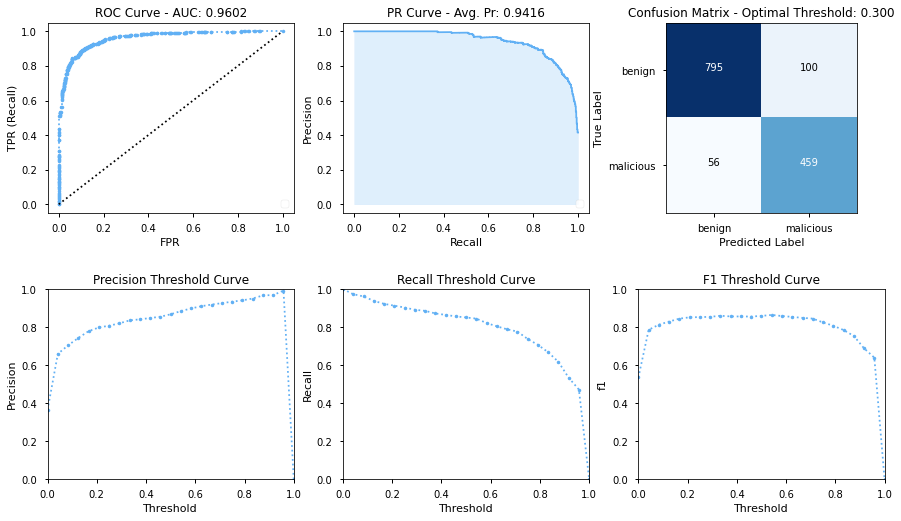

In [25]:
print(plot_curves_XGB(X_test,model_xgb_1, y_test,opt_thresh=0.3))